## Getting data



In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file 
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-10-16 16:03:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 172.253.123.128, 142.250.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   234MB/s    in 0.4s    

2022-10-16 16:03:14 (234 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Exploring the files

In [2]:
## Inspect the data
!ls pizza_steak

test  train


In [3]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [4]:
#Alternative way

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))

num_steak_images_train, num_pizza_images_train

(750, 750)

### Visulaizing the Images

In [5]:
# Getting the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [6]:
#Visualize the our images

import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir+target_class

  # Get a random image
  random_image = random.sample(os.listdir(target_folder), 1)

  # Reading the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img


Image shape: (512, 512, 3)


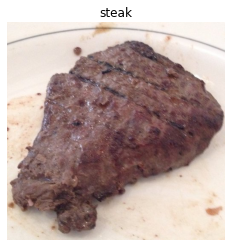

In [7]:
img = view_random_image("pizza_steak/train/", 'steak')

In [8]:
import tensorflow as tf

img_tf = tf.constant(img)
img_tf

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[245, 238, 230],
        [248, 241, 233],
        [249, 242, 234],
        ...,
        [252, 247, 243],
        [253, 248, 244],
        [254, 249, 245]],

       [[246, 239, 231],
        [249, 242, 234],
        [250, 243, 235],
        ...,
        [251, 246, 242],
        [252, 247, 243],
        [252, 247, 243]],

       [[247, 240, 232],
        [250, 243, 235],
        [250, 243, 235],
        ...,
        [250, 245, 241],
        [250, 245, 241],
        [250, 245, 241]],

       ...,

       [[245, 235, 226],
        [245, 235, 226],
        [245, 235, 226],
        ...,
        [247, 226, 207],
        [248, 227, 208],
        [248, 227, 208]],

       [[241, 231, 222],
        [243, 233, 224],
        [245, 235, 226],
        ...,
        [246, 225, 206],
        [248, 227, 208],
        [250, 229, 210]],

       [[238, 228, 219],
        [241, 231, 222],
        [245, 235, 226],
        ...,
        [243, 222, 20

In [9]:
img_tf/ 255

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.9607843 , 0.93333334, 0.9019608 ],
        [0.972549  , 0.94509804, 0.9137255 ],
        [0.9764706 , 0.9490196 , 0.91764706],
        ...,
        [0.9882353 , 0.96862745, 0.9529412 ],
        [0.99215686, 0.972549  , 0.95686275],
        [0.99607843, 0.9764706 , 0.9607843 ]],

       [[0.9647059 , 0.9372549 , 0.90588236],
        [0.9764706 , 0.9490196 , 0.91764706],
        [0.98039216, 0.9529412 , 0.92156863],
        ...,
        [0.9843137 , 0.9647059 , 0.9490196 ],
        [0.9882353 , 0.96862745, 0.9529412 ],
        [0.9882353 , 0.96862745, 0.9529412 ]],

       [[0.96862745, 0.9411765 , 0.9098039 ],
        [0.98039216, 0.9529412 , 0.92156863],
        [0.98039216, 0.9529412 , 0.92156863],
        ...,
        [0.98039216, 0.9607843 , 0.94509804],
        [0.98039216, 0.9607843 , 0.94509804],
        [0.98039216, 0.9607843 , 0.94509804]],

       ...,

       [[0.9607843 , 0.92156863, 0.8862745 ],
        [0.96

### Building a simple pipeline 

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

#Preprocess data

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Setup paths to the datasets
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#Importing data from the directories and turn into batches

train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                               batch_size = 32,
                                               target_size = (224, 224), 
                                               class_mode = "binary", 
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir, 
                                               batch_size = 32, 
                                               target_size = (224, 224), 
                                               class_mode = 'binary', 
                                               seed = 42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, 
                    kernel_size = 3, 
                    activation = 'relu', 
                    input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2, 
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'), 
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])


model_1.compile(loss = 'binary_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data, 
                        epochs = 1, #5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data, 
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
47/47 [==============================] - 19s 211ms/step - loss: 0.5744 - accuracy: 0.6960 - val_loss: 0.4067 - val_accuracy: 0.8220


In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

📚 **Resource:** https://poloclub.github.io/cnn-explainer/

## Preprocessing Data

In [12]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

📓 Friends don't let other friends use mini batch size of anything other than 32 - Yann LeCun

In [13]:
#Create train and test data generators 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)



There is method called flow_from_dataframe. Check that out for DR.

In [14]:
#Load in our image data from directories

train_data = train_datagen.flow_from_directory( directory = train_dir,
                                               target_size = (224, 224), 
                                               class_mode = 'binary', 
                                               batch_size = 32 )

test_data = test_datagen.flow_from_directory( directory = test_dir, 
                                           target_size = (224, 224), 
                                          class_mode = "binary", 
                                          batch_size = 32 ) 

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

## Creating a Baseline Model 
We build a simple model to use that as a base metric to be create much better models than that

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [17]:
baseline_model = Sequential([
    Conv2D(filters = 10, 
           kernel_size = 3,
           strides = 1,
           padding = 'valid', 
           activation = 'relu',
           input_shape = (224, 224, 3)), 
    Conv2D(10, 3, 1, activation = 'relu'), 
    Conv2D(10, 3, 1, activation = 'relu'), 
    Flatten(), 
    Dense(1, activation = 'sigmoid')
])

In [18]:
baseline_model.compile(loss = 'binary_crossentropy', 
                       optimizer = Adam(), 
                       metrics = ["accuracy"])

In [19]:
history = baseline_model.fit(train_data, 
                             epochs = 5,
                             steps_per_epoch = len(train_data),
                             validation_data = test_data, 
                             validation_steps = len(test_data)
                             )

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 1.2125 - accuracy: 0.6480 - val_loss: 0.5207 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4699 - accuracy: 0.7840 - val_loss: 0.3891 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3756 - accuracy: 0.8500 - val_loss: 0.3621 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.2333 - accuracy: 0.9187 - val_loss: 0.3349 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.0960 - accuracy: 0.9753 - val_loss: 0.4214 - val_accuracy: 0.8320


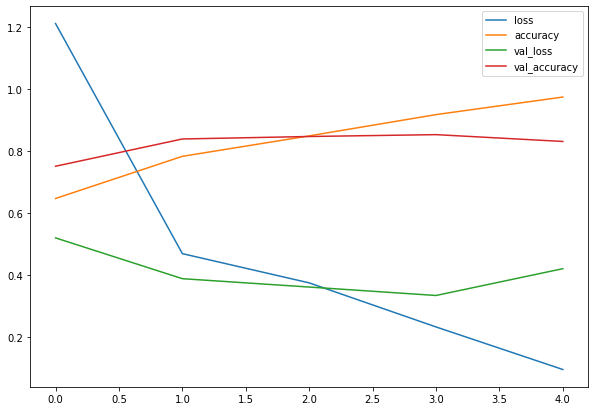

In [20]:
## Evaluation of baseline model 
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 7));

In [21]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history['val_accuracy']
  
  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label = 'Training_loss')
  plt.plot(epochs, val_loss, label= 'val_loss')
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'Training_accuracy')
  plt.plot(epochs, val_accuracy, label= 'val_accuracy')
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()


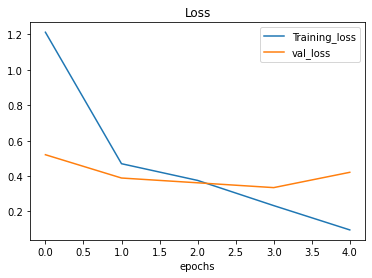

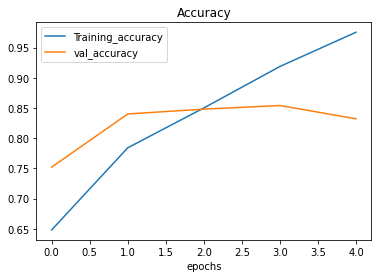

In [22]:
plot_loss_curves(history)

Observation : The model is **overfitting** the data 

## Fine Tuning the model 

A new idea:
1. Create a baseline 
2. Beat the baseline by overfitting the large model
3. Reduce Overfitting

Ways to induce overfitting: 
* Increase the no.of conv layers
* Increase the filters
* Add another dense layer to the output of our flattened layer

Reduce Overfitting: 
* Add Data Augmentation
* Add Regualarization Layer
* Add more data

In [23]:
model_1 = Sequential([
    Conv2D(10, 3, 1, activation = 'relu', input_shape = (224, 224, 3)), 
    MaxPool2D(2), 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(2), 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(2), 
    Flatten(), 
    Dense(1, activation = 'sigmoid')
])

In [24]:
model_1.compile(loss = "binary_crossentropy", 
                optimizer = Adam(), 
                metrics = ["accuracy"])

In [25]:
history_1 = model_1.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch=len(train_data), 
                        validation_data= test_data, 
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 190ms/step - loss: 0.6729 - accuracy: 0.5873 - val_loss: 0.5599 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.5114 - accuracy: 0.7453 - val_loss: 0.3985 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4112 - accuracy: 0.8207 - val_loss: 0.3847 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4001 - accuracy: 0.8240 - val_loss: 0.3274 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3841 - accuracy: 0.8360 - val_loss: 0.3324 - val_accuracy: 0.8660


In [26]:
#Get a summary 
model_1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

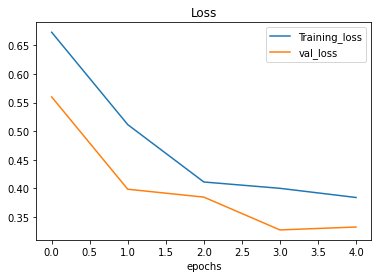

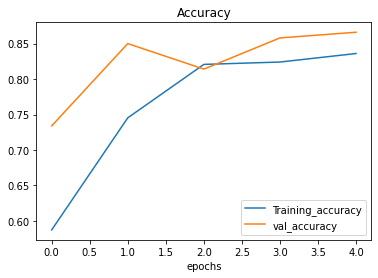

In [27]:
plot_loss_curves(history_1)

## Performing Data Augmentation 

In [28]:
# Augmenting data using Image Generator classes
train_datagen_augmented = ImageDataGenerator(rescale = 1/255. , 
                                             rotation_range = 0.2, 
                                             shear_range = 0.2, 
                                             width_shift_range = 0.2, 
                                             height_shift_range = 0.3, 
                                             horizontal_flip = True)

train_datagen = ImageDataGenerator( rescale = 1/255.)

test_datagen = ImageDataGenerator( rescale= 1/255.)

In [29]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                target_size = (224, 224), 
                                                                batch_size = 32, 
                                                                class_mode = "binary", 
                                                                shuffle = False)

train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size = (224, 224), 
                                               batch_size = 32, 
                                               class_mode = "binary", 
                                               shuffle = False)

test_data = test_datagen.flow_from_directory(test_dir, 
                                               target_size = (224, 224), 
                                               batch_size = 32, 
                                               class_mode = "binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

 showing image number: 20 


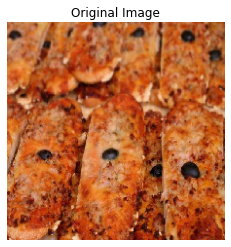

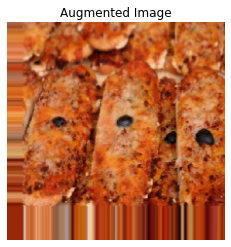

In [31]:
import random
random_number = random.randint(0, 32)

print(f" showing image number: {random_number} ")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

Training a model on augmented data

In [33]:
#Creating a model

model_6 = Sequential([
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(pool_size = 2), 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(), 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(), 
    Flatten(), 
    Dense(1, activation = 'sigmoid')
])

model_6.compile(loss = 'binary_crossentropy', 
                optimizer = Adam(), 
                metrics = ['accuracy'])

history_6 = model_6.fit(train_data_augmented, 
                        epochs = 5, 
                        steps_per_epoch = len(train_data_augmented), 
                        validation_data = test_data, 
                        validation_steps = len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 22s 453ms/step - loss: 0.7826 - accuracy: 0.5947 - val_loss: 0.7308 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 21s 446ms/step - loss: 0.7105 - accuracy: 0.5000 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6930 - accuracy: 0.5147 - val_loss: 0.6897 - val_accuracy: 0.5480
Epoch 4/5
47/47 [==============================] - 21s 446ms/step - loss: 0.6917 - accuracy: 0.5320 - val_loss: 0.6828 - val_accuracy: 0.6200
Epoch 5/5
47/47 [==============================] - 21s 446ms/step - loss: 0.6967 - accuracy: 0.5227 - val_loss: 0.6817 - val_accuracy: 0.5440


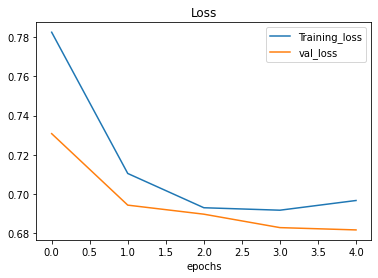

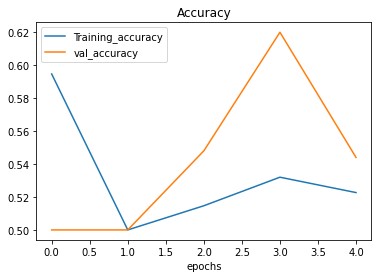

In [34]:
plot_loss_curves(history_6)

Implementing shuffling with augmentation 

In [35]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                target_size = (224, 224), 
                                                                batch_size = 32, 
                                                                class_mode = "binary", 
                                                                shuffle = True)
test_data = test_datagen.flow_from_directory(test_dir, 
                                               target_size = (224, 224), 
                                               batch_size = 32, 
                                               class_mode = "binary", 
                                               shuffle = True
                                             )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [36]:
history_7 = model_6.fit(train_data_augmented_shuffled, 
            epochs = 5,
            steps_per_epoch = len(train_data_augmented_shuffled), 
            validation_data = test_data, 
            validation_steps = len(test_data)
)


Epoch 1/5
47/47 [==============================] - 21s 453ms/step - loss: 0.6740 - accuracy: 0.6147 - val_loss: 0.6334 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 21s 450ms/step - loss: 0.6202 - accuracy: 0.6620 - val_loss: 0.4581 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 21s 447ms/step - loss: 0.5322 - accuracy: 0.7353 - val_loss: 0.4333 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 21s 440ms/step - loss: 0.5298 - accuracy: 0.7440 - val_loss: 0.3990 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 26s 566ms/step - loss: 0.5060 - accuracy: 0.7613 - val_loss: 0.3851 - val_accuracy: 0.8320


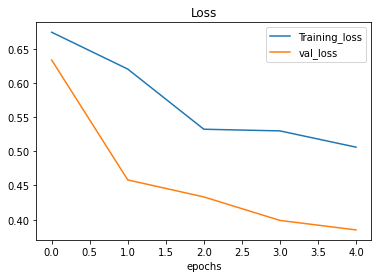

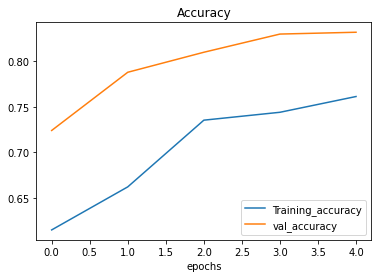

In [37]:
plot_loss_curves(history_7)

**🔑Note:** Shuffling the data makes you data learn the different classes as we move through the data. Without that, the model learns each class one by one which could lead to worse performance

In [38]:
def load_and_prep_image(filename, img_shape = 224):

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  
  return img


In [40]:
img = load_and_prep_image("steak_image.jpg")
pred = model_6.predict(tf.expand_dims(img, axis= 0))

1/1 [==============================] - 0s 60ms/step


In [41]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [42]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [53]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis = 0))

  plt.imshow(img)

  plt.title(class_names[int(tf.round(pred))])

  plt.axis(False)

  plt.show();

1/1 [==============================] - 0s 14ms/step


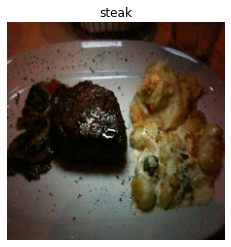

In [54]:
pred_and_plot(model_6, "steak_image.jpg")